<a href="https://colab.research.google.com/github/dianelnursa/CNN-OBJECT-DETECTION/blob/main/belajarkonvolusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selamat datang di praktek Image Processing

Sekarang teman-teman akan mencoba praktek proses konvolusi untuk mereduksi noise pada citra digital. Selamat Mencoba...


lakukan terlebih dahulu import library yang dibutuhkan. Pada percobaan ini menggunakan numpy untuk mengakses dan memanipulasi matriks piksel. Matplotlib digunakan untuk visualiasi plot menampilkan gambar. Cv2 merupakan library opencv. 

Pada percobaan ini teman-teman mahasiswa dapat mencoba proses reduksi noise menggunakan library opencv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


pada fungsi berikut ini adalah memanggil dan menampilkan image dari folder Google Drive. Anda dapat melakukan copy path seperti gambar berikut ini


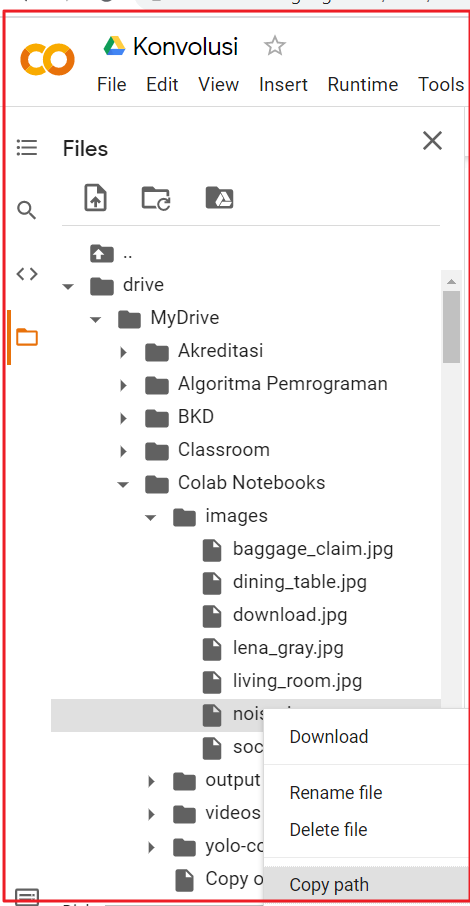

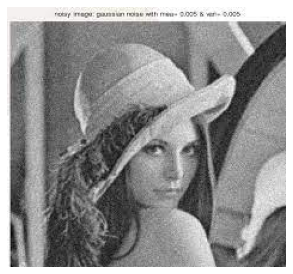

In [ ]:
img=cv2.imread('/download.jpg')
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.show()

Pada proses berikutnya adalah membuat prosedur proses konvolusi sesuai dengan alur proses yang telah dipelajari sebelumnya

In [ ]:
def conv(X, F):

    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]

    H = (F_height) // 2
    W = (F_width) // 2

    out = np.zeros((X_height, X_width))

    for i in np.arange(H+1, X_height - H):
        for j in np.arange(W+1, X_width - W):
            sum = 0
            for k in np.arange(-H, H + 1):
                for l in np.arange(-W, W + 1):
                    a = X[i + k, j + l]
                    w = F[H + k, W + l]
                    sum += (w * a)
            out[i, j] = sum

    return out


Berikutnya adalah mendeklarasikan salah satu kernel Low Pass Filter yaitu Mean Filter dan ditampilkan dengan menggunakan matplotlib (plt)

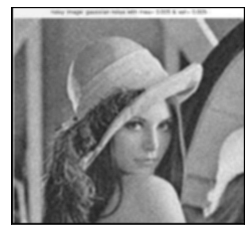

In [ ]:

img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/download.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mean = (1.0 / 9) * np.array(
    [[1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]])

img_out = conv(img, mean)
plt.imshow(img_out, cmap='gray', interpolation='bicubic')
plt.xticks([], plt.yticks([]))
plt.show()




Dari gambar citra asli dan hasil reduksi noise terlihat bahwa gambar yang kedua telah diperhalus imagenya sehingga noise lebih tidak terlihat.

Sekarang bandingkan dengan kernel Gaussian

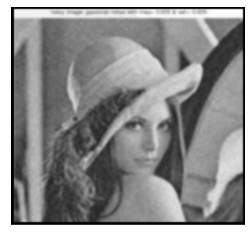

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/download.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gauss =(1.0 / 345)* np.array(
    [[1, 5, 7, 5, 1],
    [5, 20, 33, 20, 5],
    [7, 33, 55, 33, 7],
    [5, 20, 33, 20, 5],
    [1, 5, 7, 5, 1]])

img_out = conv(img, gauss)
plt.imshow(img_out, cmap='gray', interpolation='bicubic')
plt.xticks([], plt.yticks([]))
plt.show()
  

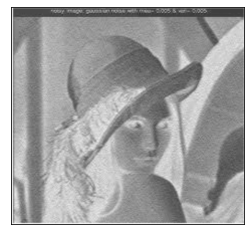

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/download.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
highpassfilter = np.array(
    [[-1, 0, 0],
    [-1, 5, -1],
    [0, -10, 0]])

img_out = conv(img, highpassfilter)
plt.imshow(img_out, cmap='gray', interpolation='bicubic')
plt.xticks([], plt.yticks([]))
plt.show()